нейронная сеть - сочетание функций. tanh лучше с отрицат. значениями, чем сигмоида

процесс обучения:
способ обучения - коррекция по ошибки.
подстройка весов связи (их коррекция).

метод градиентного спуска
производная позволяет оценить скорость изменения функции.
найти направление, где идет макс. изменение функции - градиент.
спуск по функции на уменьшение ее значения.
многомерная нелинейная поверхность: сколько параметров w, столько и измерений - поиск минимума.
коррекция весов связи в зависимости от градиента функции потерь.
контурное представление: высота точек по цветам на графике.

алгоритм обратного распространения ошибки
пример. MLP с двумя скрытми слоями
ошибку можем посчитать на выходе
проблема: обучение скрытых нейронов, их выходы и ошибки не известны. ранее - эквристические способы, не давали рез-та.

правило цепочки.
если есть y=f(u), тогда dy/dx=(dy/du)*(du/dx) // частные производные
нейронная сеть - композиция множества функций
E=f(w). чем глубже параметры в сети, тем больше цепочка требуется

y=fa(P)
fa - функция активации
P - потенциал
P=f(w)

все функции должны быть дифференцируемы
например, ступенчатая функция активации - не дифф., не применяется

сигмоида - дифф-ма на всей области определения
"-" в формуле - движение в сторону уменьшения ошибки

локальный градиент (дельта-правило) δ

в процессе обучения на шаге k+1 к весу связи добавляем предыдущее значение
величина δ вычисляется в зависимости от ошибки.
на выходе δ - применяется лишь ее часть

1. градиент для нейрона выходного слоя
2. используя правило цепочки, рассчитываем δ для нейрона скрытого слоя через δ предыдущего слоя

δ храним в массиве
в формуле участвуют
коэф-т скорости обучения
δ
градиент
входной сигнал

стратегии корректировки весов
1) после каждого примера
сеть забывает связь с предыдущим при подаче нового примера
2) корректировка по среднему по эпохе
1 прогон, подсчет δ, усредняем, используем единократно в эпоху для корректировки

окончание обучения:
1. достигнута закладываемая точность
2. останов по эпохам

проблема исчезающих градиентов (малые значения, ничего не изменяется в процессе)
проблема взрывающихся градиентов (переменожение и большие значения выбивают сеть из стабильного состояния)

Практика 3
для датасета MNIST использовать MLP
(слои, нейроны) обучить и получить результат классификации

рукописные символы разворачиваем в вектор (растровое изображение на вход сети)

входы нейрона: размер вектора - 24x24
на выходе - 10 нейронов

функция на выходе - категориальная классификация. softmax. отображение лоигистической функции на многомерное пространство. softmax дает распределение классов от 0 до 1

In [ ]:
!pip install patool

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.5/86.5 kB 4.4 MB/s eta 0:00:00


In [ ]:
# prepare data
# https://drive.google.com/file/d/1A5UzyOKCYmtHt1tYxLRhs7HrHY6tEiA6/view?usp=sharing
from google.colab import drive
import zipfile
import os

drive.mount('/content/drive')
path_to_zip_file = '/content/drive/MyDrive/Colab Notebooks/Datasets/MNIST Dataset JPG format.zip'
extract_path = '/content/datasets/mnist_dataset'
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

!ls -la {extract_path}

Mounted at /content/drive
total 12
drwxr-xr-x 3 root root 4096 Sep 28 15:03  .
drwxr-xr-x 3 root root 4096 Sep 28 15:03  ..
drwxr-xr-x 4 root root 4096 Sep 28 15:03 'MNIST Dataset JPG format'


total images: 70000
train data: (56000, 28, 28) (80.0%)
test data: (14000, 28, 28) (20.0%)
train labels: (56000,)
test labels: (14000,)
train data: (56000, 784)
test data: (14000, 784)
train labels (one-hot): (56000, 10)
test labels (one-hot): (14000, 10)


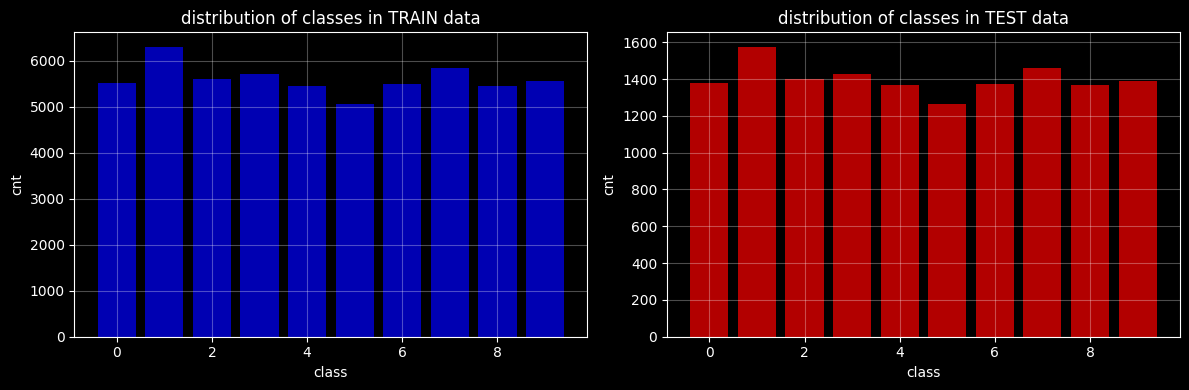

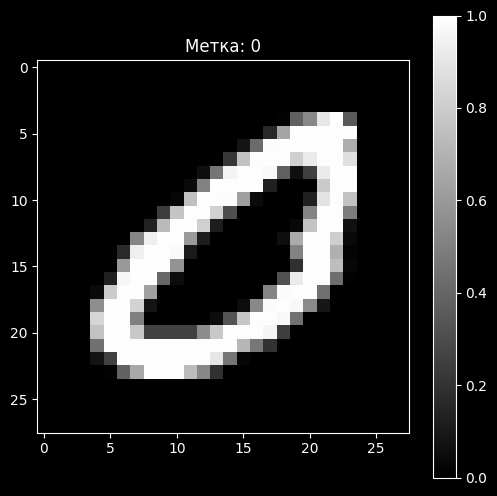

C:\Users\gleb\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "mlp_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

epoch 1/10
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8968 - loss: 0.3509 - val_accuracy: 0.9661 - val_loss: 0.1123
epoch: 1 | train losses: 0.2083 | train acc: 0.9389 | test losses: 0.1123 | test acc: 0.9661

epoch 2/10
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9728 - loss: 0.0906 - val_accuracy: 0.9739 - val_loss: 0.0841
epoch: 2 | train losses: 0.0820 | train acc: 0.9750 | test losses: 0.0841 | test acc: 0.9739

epoch 3/10
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9839 - loss: 0.0525 - val_accuracy: 0.9751 - val_loss: 0.0829
epoch: 3 | train losses: 0.0490 | train acc: 0.9849 | test losses: 0.0829 | test acc: 0.9751

epoch 4/10
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9917 - loss: 0.0317 - val_accuracy: 0.9737 - val_loss: 0.0931
epoch: 4 | train losses: 0.0304 | train acc: 0.9916 | test losses: 0.0931 | test acc: 0.9737

epoch 5/10
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9940 - loss: 0.0215 - val_accuracy:

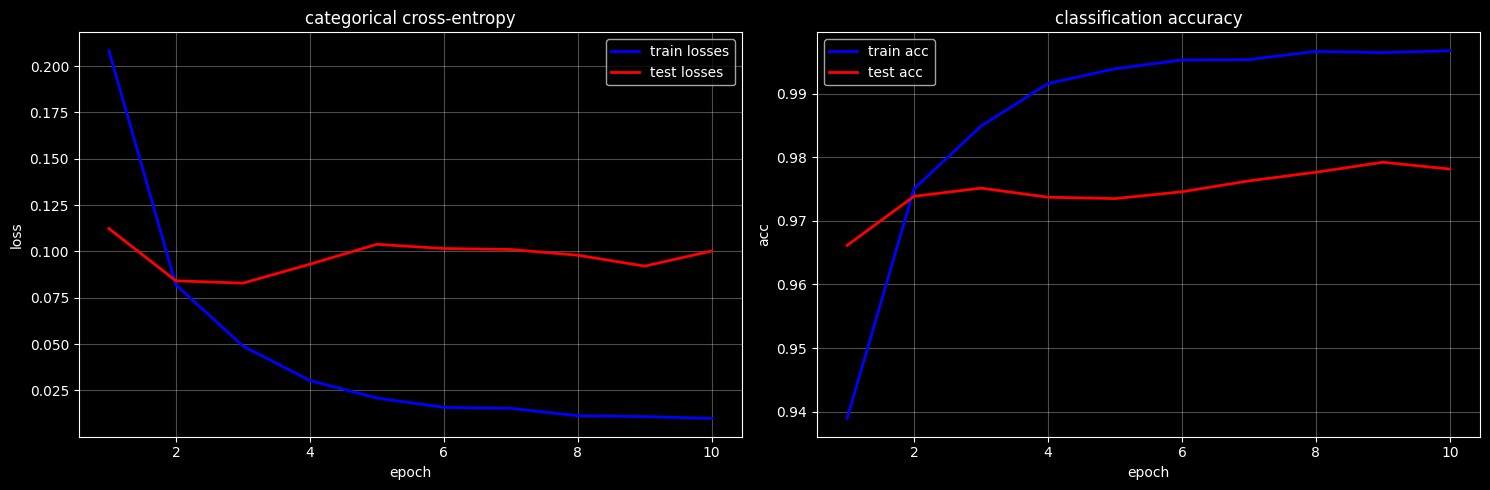

test losses: 0.1002
test accuracy: 0.9781

test data
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
predict: [7 3 1 1 2 5 9 8 8 1]
real vals: [7 3 1 1 2 5 9 8 8 1]


) missing from font(s) DejaVu Sans.ykernel_4896\1519923276.py:165: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from font(s) DejaVu Sans.s\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


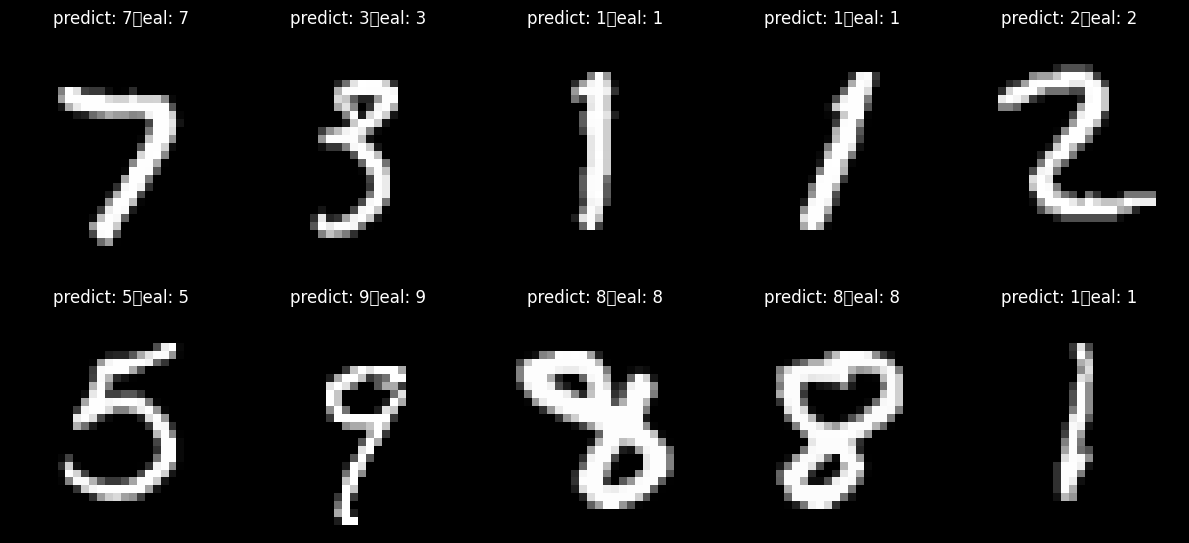

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1381
           1       0.98      0.99      0.98      1575
           2       0.98      0.98      0.98      1398
           3       0.97      0.98      0.97      1428
           4       0.99      0.96      0.98      1365
           5       0.99      0.96      0.97      1263
           6       0.98      0.99      0.99      1375
           7       0.99      0.97      0.98      1459
           8       0.98      0.97      0.97      1365
           9       0.94      0.98      0.96      1391

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000


accuracy:
Класс 0: 0.998
Класс 1: 0.994
Класс 2: 0.981
Класс 3: 0.979
Класс 4: 0.962
Класс 5: 0.959
Класс 6: 0.991
Класс 7: 0.971
Класс 8: 0.966
Класс 9: 0.978
total images: 7

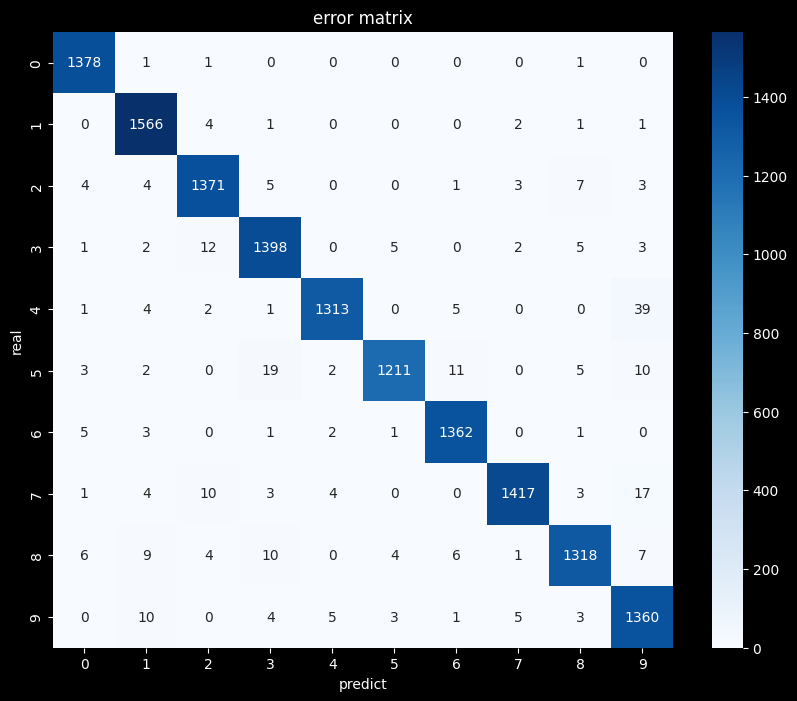

In [4]:

import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

tf.random.set_seed(1)
np.random.seed(1)

EPOCH = 10
BATCH_SIZE = 50
LR = 0.001
TEST_SIZE = 0.2

(x_train_full, y_train_full), (x_test_original, y_test_original) = mnist.load_data()

x_all = np.concatenate([x_train_full, x_test_original])
y_all = np.concatenate([y_train_full, y_test_original])

x_train, x_test, y_train, y_test = train_test_split(
    x_all, y_all,
    test_size=TEST_SIZE,
    random_state=42,
    stratify=y_all
)

print(f"total images: {len(x_all)}")
print(f"train data: {x_train.shape} ({len(x_train)/len(x_all)*100:.1f}%)")
print(f"test data: {x_test.shape} ({len(x_test)/len(x_all)*100:.1f}%)")
print(f"train labels: {y_train.shape}")
print(f"test labels: {y_test.shape}")

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

y_train_categorical = keras.utils.to_categorical(y_train, 10)
y_test_categorical = keras.utils.to_categorical(y_test, 10)

print(f"train data: {x_train.shape}")
print(f"test data: {x_test.shape}")
print(f"train labels (one-hot): {y_train_categorical.shape}")
print(f"test labels (one-hot): {y_test_categorical.shape}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
train_class_counts = np.bincount(y_train)
plt.bar(range(10), train_class_counts, color='blue', alpha=0.7)
plt.title('distribution of classes in TRAIN data')
plt.xlabel('class')
plt.ylabel('cnt')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
test_class_counts = np.bincount(y_test)
plt.bar(range(10), test_class_counts, color='red', alpha=0.7)
plt.title('distribution of classes in TEST data')
plt.xlabel('class')
plt.ylabel('cnt')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title(f'Метка: {y_train[0]}')
plt.colorbar()
plt.show()

class MLP(tf.keras.Model):
    def __init__(self):
        super(MLP, self).__init__()
        self.dense1 = layers.Dense(28*28, activation='relu')
        self.dense2 = layers.Dense(10, activation='softmax')

    def call(self, x):
        x = self.dense1(x)
        return self.dense2(x)

mlp = MLP()

mlp.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LR),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

mlp.build(input_shape=(None, 28*28))
mlp.summary()

train_loss_history = []
train_accuracy_history = []
test_loss_history = []
test_accuracy_history = []

for epoch in range(EPOCH):
    print(f'epoch {epoch+1}/{EPOCH}')

    history = mlp.fit(
        x_train, y_train_categorical,
        batch_size=BATCH_SIZE,
        epochs=1,
        verbose=1,
        validation_data=(x_test, y_test_categorical)
    )

    train_loss_history.append(history.history['loss'][0])
    train_accuracy_history.append(history.history['accuracy'][0])
    test_loss_history.append(history.history['val_loss'][0])
    test_accuracy_history.append(history.history['val_accuracy'][0])

    print(f'epoch: {epoch+1} | train losses: {history.history["loss"][0]:.4f} | '
          f'train acc: {history.history["accuracy"][0]:.4f} | '
          f'test losses: {history.history["val_loss"][0]:.4f} | '
          f'test acc: {history.history["val_accuracy"][0]:.4f}\n')

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCH + 1), train_loss_history, 'b-', label='train losses', linewidth=2)
plt.plot(range(1, EPOCH + 1), test_loss_history, 'r-', label='test losses', linewidth=2)
plt.title('categorical cross-entropy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCH + 1), train_accuracy_history, 'b-', label='train acc', linewidth=2)
plt.plot(range(1, EPOCH + 1), test_accuracy_history, 'r-', label='test acc', linewidth=2)
plt.title('classification accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

test_loss, test_accuracy = mlp.evaluate(x_test, y_test_categorical, verbose=0)
print(f'test losses: {test_loss:.4f}')
print(f'test accuracy: {test_accuracy:.4f}')

print("\ntest data")
predictions = mlp.predict(x_test[:10])
predicted_classes = np.argmax(predictions, axis=1)

print('predict:', predicted_classes)
print('real vals:', y_test[:10])

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'predict: {predicted_classes[i]}\real: {y_test[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

def predict_custom_image(image_path, model):
    from PIL import Image

    image = Image.open(image_path).convert('L')  # grayscale
    image = image.resize((28, 28))

    image_array = np.array(image).astype('float32') / 255.0

    if np.mean(image_array) > 0.5:
        image_array = 1.0 - image_array

    image_flat = image_array.reshape(1, 28*28)

    prediction = model.predict(image_flat, verbose=0)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    plt.figure(figsize=(4, 4))
    plt.imshow(image_array, cmap='gray')
    plt.title(f'predict: {predicted_class}\nconfidence: {confidence:.2f}')
    plt.axis('off')
    plt.show()

    return predicted_class, confidence

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

all_predictions = mlp.predict(x_test)
all_predicted_classes = np.argmax(all_predictions, axis=1)

cm = confusion_matrix(y_test, all_predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('error matrix')
plt.xlabel('predict')
plt.ylabel('real')
# plt.show()

print("\nclassification report:")
print(classification_report(y_test, all_predicted_classes))

class_accuracy = cm.diagonal() / cm.sum(axis=1)
print("\naccuracy:")
for i, acc in enumerate(class_accuracy):
    print(f'Класс {i}: {acc:.3f}')

print(f"total images: {len(x_all)}")
print(f"test: {len(x_train)} imgs ({len(x_train)/len(x_all)*100:.1f}%)")
print(f"test data: {len(x_test)} imgs ({len(x_test)/len(x_all)*100:.1f}%)")
